In [1]:
import sys
root_dir = '../../../'
sys.path.append(root_dir)

In [2]:
import pickle
from utils import *
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Load data

In [4]:
df = pd.read_csv('../01_daemon/e-df.csv', header=None)
df.head()

,0,1,2,3,4,5
0,0.070136,2.220446e-16,0.839506,0.839506,0.000000,1.0
1,0.096771,2.160405e-02,0.845714,0.800000,0.287525,1.0
2,0.130171,7.689796e-04,0.719298,0.614035,0.026756,1.0
3,0.114594,2.399055e-03,0.460526,0.171053,0.034470,1.0
4,0.051869,1.691872e-02,0.724490,0.632653,0.056796,1.0


In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=23
)

## SVM Classifier

In [8]:
param_grid = {
    'C': [1, 3, 5],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
estimator = SVC()
svc = GridSearchCV(
    estimator = estimator, 
    param_grid = param_grid,
    scoring = 'accuracy'
)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [9]:
print(f'best estimator:\t\t{svc.best_estimator_}')
print(f'best params:\t\t{svc.best_params_}')
print(f'accuracy:\t\t{accuracy_score(y_test, y_pred)}')
print('\nClassification report:')
print(classification_report(y_test, y_pred))

best estimator:		SVC(C=5)
best params:		{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
accuracy:		0.7624695863746959

Classification report:
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.76      1637
         1.0       0.77      0.76      0.76      1651

    accuracy                           0.76      3288
   macro avg       0.76      0.76      0.76      3288
weighted avg       0.76      0.76      0.76      3288



In [10]:
with open('e-svc.pickle', 'wb') as f:
    pickle.dump(svc, f)

## KNN Classifier

In [11]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],
    'weights': ['uniform', 'distance'],
    'leaf_size': [5, 10, 15, 20, 25, 30]
}
estimator = KNeighborsClassifier()
knn = GridSearchCV(
    estimator = estimator, 
    param_grid = param_grid,
    scoring = 'accuracy'
)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [12]:
print(f'best estimator:\t\t{knn.best_estimator_}')
print(f'best params:\t\t{knn.best_params_}')
print(f'accuracy:\t\t{accuracy_score(y_test, y_pred)}')
print('\nClassification report:')
print(classification_report(y_test, y_pred))

best estimator:		KNeighborsClassifier(leaf_size=5, n_neighbors=17, weights='distance')
best params:		{'leaf_size': 5, 'n_neighbors': 17, 'weights': 'distance'}
accuracy:		0.7837591240875912

Classification report:
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79      1637
         1.0       0.80      0.75      0.78      1651

    accuracy                           0.78      3288
   macro avg       0.78      0.78      0.78      3288
weighted avg       0.79      0.78      0.78      3288



In [13]:
with open('e-knn.pickle', 'wb') as f:
    pickle.dump(knn, f)

## Logistic Regression

In [14]:
logreg = LogisticRegression()

param_grid = {
    'C': [1, 3, 5], 
    'penalty': ['l1', 'l2', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [1000]

}
estimator = LogisticRegression()
logreg = GridSearchCV(
    estimator = estimator, 
    param_grid = param_grid,
    scoring = 'accuracy'
)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [15]:
print(f'best estimator:\t\t{logreg.best_estimator_}')
print(f'best params:\t\t{logreg.best_params_}')
print(f'accuracy:\t\t{accuracy_score(y_test, y_pred)}')
print('\nClassification report:')
print(classification_report(y_test, y_pred))

best estimator:		LogisticRegression(C=3, max_iter=1000, penalty='l1', solver='saga')
best params:		{'C': 3, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
accuracy:		0.7527372262773723

Classification report:
              precision    recall  f1-score   support

         0.0       0.75      0.76      0.75      1637
         1.0       0.76      0.74      0.75      1651

    accuracy                           0.75      3288
   macro avg       0.75      0.75      0.75      3288
weighted avg       0.75      0.75      0.75      3288



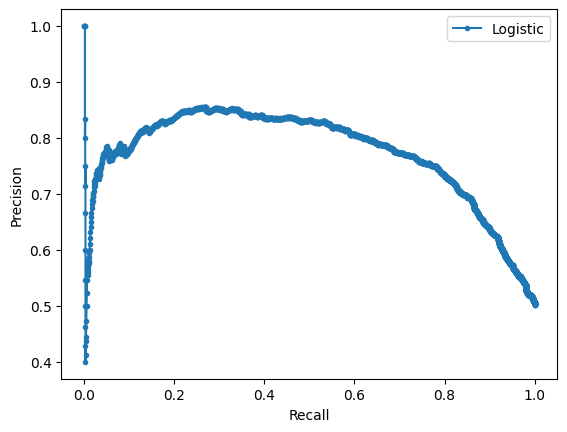

In [16]:
lr_probs = logreg.predict_proba(X_test)
lr_probs = lr_probs[:, 1]  # keep probabilities for the positive outcome only
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [17]:
with open('e-logreg.pickle', 'wb') as f:
    pickle.dump(logreg, f)

## Gradient Boosting Classifier

In [18]:
param_grid = {
    'learning_rate': [0.01, 0.1 ], 
    'n_estimators': [100, 500, 1000]
}
estimator = GradientBoostingClassifier()
gradboost = GridSearchCV(
    estimator = estimator,
    param_grid = param_grid,
    scoring = 'accuracy'
)
gradboost.fit(X_train, y_train)
y_pred = gradboost.predict(X_test)

In [19]:
print(f'best estimator:\t\t{gradboost.best_estimator_}')
print(f'best params:\t\t{gradboost.best_params_}')
print(f'accuracy:\t\t{accuracy_score(y_test, y_pred)}')
print('\nClassification report:')
print(classification_report(y_test, y_pred))

best estimator:		GradientBoostingClassifier(n_estimators=500)
best params:		{'learning_rate': 0.1, 'n_estimators': 500}
accuracy:		0.808698296836983

Classification report:
              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81      1637
         1.0       0.83      0.78      0.80      1651

    accuracy                           0.81      3288
   macro avg       0.81      0.81      0.81      3288
weighted avg       0.81      0.81      0.81      3288



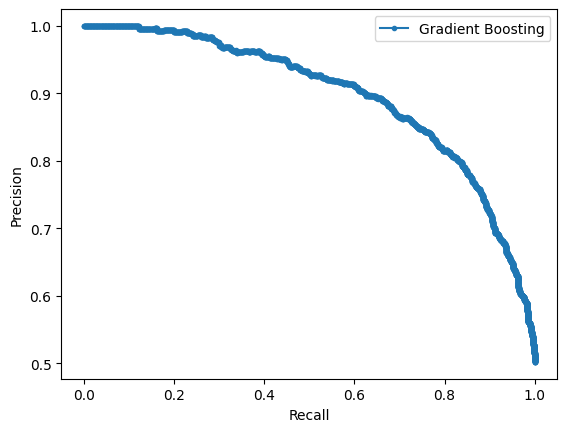

In [20]:
lr_probs = gradboost.predict_proba(X_test)
lr_probs = lr_probs[:, 1]  # keep probabilities for the positive outcome only
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
plt.plot(lr_recall, lr_precision, marker='.', label='Gradient Boosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [21]:
with open('e-gradboost.pickle', 'wb') as f:
    pickle.dump(gradboost, f)

## MLP Classifier

In [22]:
param_grid = {
    'solver': ['adam'], 
    'activation': ['relu']
}
estimator = MLPClassifier()
mlp = GridSearchCV(
    estimator = estimator,
    param_grid = param_grid,
    scoring = 'accuracy'
)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

In [23]:
print(f'best estimator:\t\t{mlp.best_estimator_}')
print(f'best params:\t\t{mlp.best_params_}')
print(f'accuracy:\t\t{accuracy_score(y_test, y_pred)}')
print('\nClassification report:')
print(classification_report(y_test, y_pred))

best estimator:		MLPClassifier()
best params:		{'activation': 'relu', 'solver': 'adam'}
accuracy:		0.7709854014598541

Classification report:
              precision    recall  f1-score   support

         0.0       0.77      0.78      0.77      1637
         1.0       0.78      0.76      0.77      1651

    accuracy                           0.77      3288
   macro avg       0.77      0.77      0.77      3288
weighted avg       0.77      0.77      0.77      3288



In [24]:
with open('e-mlp.pickle', 'wb') as f:
    pickle.dump(mlp, f)